                                     
##                            Taller 1. 
####                MAESTRIA EN ITELIGENCIA DE NEGOCIO   
####                     SEMINARIO DE PROGRAMACION
####                   UNIVERSIDAD EXTERNADO DE COLOMBIA                         
####                 SANTIAGO BERNAL - MARIA TERESA CAMACHO       

_______


## Librerias a utilizar:


In [186]:
!pip install openpyxl

import pandas as pd
from sodapy import Socrata
from pandas_profiling import ProfileReport
import numpy as np
from ipywidgets import interact, Layout
import ipywidgets as widgets
from IPython.display import display
import os
from datetime import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
from dataprep.eda import plot
from dataprep.datasets import load_dataset

## Importación de la base de datos SECOPII:
    

In [187]:
# Importación de la base de datos

client = Socrata("www.datos.gov.co", None)

# Se seleccionan las primeras 10000 filas de la base, y por medio de la libreria sodapy se convierte a python

results = client.get("jbjy-vk9h", limit = 10000)

# Se conviertrte a un Data frame de pandas
DF = pd.DataFrame.from_records(results)

In [188]:
# Obtenemos información del dataframe, tenemos 71 columnas y son de tipo objeto
DF.info()
#DF.to_excel('Dataframesecopii.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 71 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   nombre_entidad                                                    10000 non-null  object
 1   nit_entidad                                                       10000 non-null  object
 2   departamento                                                      10000 non-null  object
 3   ciudad                                                            10000 non-null  object
 4   localizaci_n                                                      10000 non-null  object
 5   orden                                                             10000 non-null  object
 6   sector                                                            10000 non-null  object
 7   rama                                     

In [189]:
# En la descripción de las variables del data frame no se encuentra la variable región por lo tanto se requiere
# cargar el data frame que contiene la siguiente correlativa respecto a las regiones.

# Vamos a trabajar con las siguientes regiones:
# . Antioquia
# . Bogotá - Cundinamarca (agrupa Bogotá y Cundinamarca)
# . Caribe (agrupa los departamentos de: Arquipiélago de san andrés, providencia y santa catalina, Atlántico,
#           Bolívar, Cesar, Córdoba, La Guajira, Magdalena y Sucre)
# . Centro Oriente (Boyacá, Norte de Santander, Santander)
# . Centro Sur (Amazonas, Caquetá, Huila, Putumayo y Tolima)
# . Eje Cafetero (Caldas, Quindío y Risaralda)
# . Llanos (Arauca, Casanare, Guainía, Guaviare, Meta, Vaupés y Vichada)
# . Pacífica (Cauca, Chocó, Nariño y Valle del Cauca)

# Por lo tanto vamos a importar dichas regiones para luego pegarlas a la base de datos
DF_Regiones = pd.read_csv('https://raw.githubusercontent.com/sbgbernal2/TALLER1/main/DATOS/DATOS_SIN_PROCESAR/REGIONES.csv')
DF_Regiones

,departamento,region
0,Amazonas,Centro sur
1,Antioquia,Antioquia
2,Arauca,Llanos
3,Archipielago de San andres Providencia y Sant...,Caribe
4,Atlántico,Caribe
5,Bogota D. C.,Bogota/cundinamarca
6,Bolívar,Caribe
7,Boyacá,Centro oriente
8,Caldas,Eje cafetero
9,Caquetá,Centro sur


In [190]:
# Antes de realizar el peque de la variable region, vamos a revisar las categorias de la llave que será departamento en ambos data frames
# DF y DF_Regiones
print("Categorías de departamento en DF")
print(DF['departamento'].sort_values().unique())

print("   ")

print("Categorías de departamento en DF_Regiones")
print(DF_Regiones['departamento'].unique())

Categorías de departamento en DF
['Amazonas' 'Antioquia' 'Arauca' 'Atlántico' 'Bolívar' 'Boyacá' 'Caldas'
 'Caquetá' 'Casanare' 'Cauca' 'Cesar' 'Chocó' 'Cundinamarca' 'Córdoba'
 'Distrito Capital de Bogotá' 'Guainía' 'Guaviare' 'Huila' 'La Guajira'
 'Magdalena' 'Meta' 'Nariño' 'No Definido' 'Norte de Santander' 'Putumayo'
 'Quindío' 'Risaralda' 'San Andrés, Providencia y Santa Catalina'
 'Santander' 'Sucre' 'Tolima' 'Valle del Cauca' 'Vaupés' 'Vichada']
   
Categorías de departamento en DF_Regiones
['Amazonas' 'Antioquia' 'Arauca'
 'Archipielago de San andres Providencia y  Santa Catalina' 'Atlántico'
 'Bogota D. C.' 'Bolívar' 'Boyacá' 'Caldas' 'Caquetá' 'Casanare' 'Cauca'
 'Cesar' 'Chocó' 'Córdoba' 'Cundinamarca' 'Guainia' 'Guaviare' 'Huila'
 'La Guajira' 'Magdalena' 'Meta' 'Narino' 'No definido'
 'Norte de Santander' 'Putumayo' 'Quindío' 'Risaralda' 'Santander' 'Sucre'
 'Tolima' 'Valle del Cauca' 'Vaupes' 'Vichada']


In [191]:
# De lo anterior se observa que deben ajustarse los siguientes departamentos a:

# . "Archipiélago de san andrés, providencia y  santa catalina" pasarlo a: "San Andrés, Providencia y Santa Catalina"
DF_Regiones.replace({'Bogota D. C.':'Distrito Capital de Bogotá'},inplace=True)
# - "Bogotá, D. C." a "Distrito Capital de Bogotá"
DF_Regiones.replace({'Archipielago de San andres Providencia y  Santa Catalina': 'San Andrés, Providencia y Santa Catalina'},inplace=True)

In [192]:
# Ahora verificaremos que hayan quedado bien los ajustes:
print("Categorías de departamento en DF")
print(DF['departamento'].sort_values().unique())

print("   ")

print("Categorías de departamento en DF_Regiones")
print(DF_Regiones['departamento'].unique())

Categorías de departamento en DF
['Amazonas' 'Antioquia' 'Arauca' 'Atlántico' 'Bolívar' 'Boyacá' 'Caldas'
 'Caquetá' 'Casanare' 'Cauca' 'Cesar' 'Chocó' 'Cundinamarca' 'Córdoba'
 'Distrito Capital de Bogotá' 'Guainía' 'Guaviare' 'Huila' 'La Guajira'
 'Magdalena' 'Meta' 'Nariño' 'No Definido' 'Norte de Santander' 'Putumayo'
 'Quindío' 'Risaralda' 'San Andrés, Providencia y Santa Catalina'
 'Santander' 'Sucre' 'Tolima' 'Valle del Cauca' 'Vaupés' 'Vichada']
   
Categorías de departamento en DF_Regiones
['Amazonas' 'Antioquia' 'Arauca'
 'San Andrés, Providencia y Santa Catalina' 'Atlántico'
 'Distrito Capital de Bogotá' 'Bolívar' 'Boyacá' 'Caldas' 'Caquetá'
 'Casanare' 'Cauca' 'Cesar' 'Chocó' 'Córdoba' 'Cundinamarca' 'Guainia'
 'Guaviare' 'Huila' 'La Guajira' 'Magdalena' 'Meta' 'Narino' 'No definido'
 'Norte de Santander' 'Putumayo' 'Quindío' 'Risaralda' 'Santander' 'Sucre'
 'Tolima' 'Valle del Cauca' 'Vaupes' 'Vichada']


In [193]:
#Ahora si podemos pegar la variable region al data frame DF
DF_Listo = pd.merge(DF,DF_Regiones, on='departamento', how="outer")
DF_Listo.sample(3)

,nombre_entidad,nit_entidad,departamento,ciudad,localizaci_n,orden,sector,rama,entidad_centralizada,proceso_de_compra,id_contrato,referencia_del_contrato,estado_contrato,codigo_de_categoria_principal,descripcion_del_proceso,tipo_de_contrato,modalidad_de_contratacion,justificacion_modalidad_de,fecha_de_firma,fecha_de_inicio_del_contrato,fecha_de_fin_del_contrato,condiciones_de_entrega,tipodocproveedor,documento_proveedor,proveedor_adjudicado,es_grupo,es_pyme,habilita_pago_adelantado,liquidaci_n,obligaci_n_ambiental,obligaciones_postconsumo,reversion,valor_del_contrato,valor_de_pago_adelantado,valor_facturado,valor_pendiente_de_pago,valor_pagado,valor_amortizado,valor_pendiente_de,valor_pendiente_de_ejecucion,estado_bpin,c_digo_bpin,anno_bpin,saldo_cdp,saldo_vigencia,espostconflicto,urlproceso,destino_gasto,origen_de_los_recursos,dias_adicionados,puntos_del_acuerdo,pilares_del_acuerdo,nombre_representante_legal,nacionalidad_representante_legal,tipo_de_identificaci_n_representante_legal,identificaci_n_representante_legal,g_nero_representante_legal,presupuesto_general_de_la_nacion_pgn,sistema_general_de_participaciones,sistema_general_de_regal_as,recursos_propios_alcald_as_gobernaciones_y_resguardos_ind_genas_,recursos_de_credito,recursos_propios,ultima_actualizacion,codigo_entidad,codigo_proveedor,objeto_del_contrato,fecha_de_inicio_de_ejecucion,fecha_de_fin_de_ejecucion,fecha_inicio_liquidacion,fecha_fin_liquidacion,region
4370,ALCALDIA DEL MUNICIPIO DE ACACIAS,892001457,Meta,Acacías,"Colombia, Meta , Acacías",Territorial,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.3237083,CO1.PCCNTR.3994539,OCA-651-2022,En ejecución,V1.70122006,PRESTACIÓN DE SERVICIOS TÉCNICOS DE APOYO PARA...,Prestación de servicios,Contratación directa,ServiciosProfesionales,2022-09-06T17:09:09.000,2022-09-07T00:00:00.000,2022-12-28T00:00:00.000,Como acordado previamente,Cédula de Ciudadanía,40429864,YOLANDA VARGAS RINCON,No,No,No,No,No,No,No,10640000,0,10640000,0,10640000,0,0,10640000,Válido,No Definido,N/D,11400000,0,No,{'url': 'https://community.secop.gov.co/Public...,Inversión,Distribuido,0,No aplica,No aplica,YOLANDA VARGAS RINCON,COLOMBIANA,Cédula de Ciudadanía,40429864,Mujer,0,0,0,10640000,0,0,2022-09-12T00:00:00.000,706570512,718829492,PRESTACIÓN DE SERVICIOS TÉCNICOS DE APOYO PARA...,NaN,NaN,NaN,NaN,Llanos
2190,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,900959048,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.1669344,CO1.PCCNTR.2144433,3168-2021,Modificado,V1.80111600,Prestar servicios de apoyo a la gestión admini...,Prestación de servicios,Contratación régimen especial,Regla aplicable,2021-01-25T08:01:59.000,2021-02-01T00:00:00.000,2022-01-31T00:00:00.000,Como acordado previamente,Cédula de Ciudadanía,1023908995,ALEJNADRA BOHORQUEZ AVENDAÑO,No,No,No,No,No,No,No,26195767,0,0,26195767,0,0,0,26195767,Válido,No Definido,2020,46541232000,0,No,{'url': 'https://community.secop.gov.co/Public...,Funcionamiento,Distribuido,0,No aplica,No aplica,ALEJANDRA BOHORQUEZ AVENDAÑO,COLOMBIANA,Sin Descripcion,1023908995,No Definido,0,0,0,26195767,0,0,2022-01-07T00:00:00.000,702486788,703250712,Prestar servicios de apoyo a la gestión admini...,NaN,NaN,NaN,NaN,Bogota/cundinamarca
8803,CORPORACION AUTONOMA REGIONAL DEL MAGDALENA,800099287,Magdalena,Santa Marta,"Colombia, Magdalena , Santa Marta",Corporación Autónoma,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Centralizada,CO1.BDOS.2114165,CO1.PCCNTR.2692152,CD 266 DE 2021,terminado,V1.77101706,Prestar los servicios profesionales de apoyo j...,Prestación de servicios,Contratación directa,ServiciosProfesionales,2021-07-22T10:07:17.000,2021-07-23T00:00:00.000,2022-01-07T00:00:00.000,A convenir,Cédula de Ciudadanía,26670823,Eliana Patricia Toro Alvarez,No,No,No,No,No,No,No,28600000,0,28600000,0,28600000,0,0,28600000,Válido,No Definido,2022,28600000,0,No,{'url': 'https://community.secop.gov.co/Public...,Funcionamie

In [194]:
# Ahora sí el data frame cuenta con todas las variables necesarias. Las 72 variables son objetos.

DF_Listo.dtypes

nombre_entidad                  object
nit_entidad                     object
departamento                    object
ciudad                          object
localizaci_n                    object
                                 ...  
fecha_de_inicio_de_ejecucion    object
fecha_de_fin_de_ejecucion       object
fecha_inicio_liquidacion        object
fecha_fin_liquidacion           object
region                          object
Length: 72, dtype: object

In [195]:
# Para seleccionar el sector de análisis, identificamos la opciones de respuesta de la variable sector.
DF_Listo['sector'].unique()

array(['Salud y Protección Social', 'Servicio Público',
       'Educación Nacional', 'No aplica/No pertenece',
       'Inclusión Social y Reconciliación', 'Cultura',
       'Ambiente y Desarrollo Sostenible', 'Ley de Justicia', 'defensa',
       'Industria', 'interior', 'agricultura',
       'Vivienda, Ciudad y Territorio', 'Transporte', 'Trabajo',
       'Hacienda y Crédito Público', 'Planeación', 'Minas y Energía',
       'deportes', 'Información Estadística',
       'Tecnologías de la Información y las Comunicaciones',
       'Presidencia de la República', 'Ciencia Tecnología',
       'Relaciones Exteriores',
       'Inteligencia Estratégica y Contrainteligencia', nan], dtype=object)

In [196]:
# vamos a convertir todas las fechas en formato fecha, para poder mas adelante filtrar por las fechas. 
# Vamos a convertir los valores de los contratos a numeros.
DF_Listo['fecha_de_inicio_del_contrato'] = pd.to_datetime(DF_Listo['fecha_de_inicio_del_contrato'])
DF_Listo['fecha_de_fin_del_contrato'] = pd.to_datetime(DF_Listo['fecha_de_fin_del_contrato'])

# Vamos a convertir los valores de los contratos a numeros.
DF_Listo['valor_del_contrato'] = pd.to_numeric(DF_Listo['valor_del_contrato'])

In [197]:
# De acuerdo con lo anterior, seleccionamos el sector "Servicio Público" creando un nuevo data frame
# que será el que utilicemos de aquí en adelante.

DF_SPublico = DF_Listo[(DF_Listo['sector']=='Servicio Público')]

# Generamos una muestra de 3 observaciones para visualizar el dataframe
DF_SPublico.sample(3)

,nombre_entidad,nit_entidad,departamento,ciudad,localizaci_n,orden,sector,rama,entidad_centralizada,proceso_de_compra,id_contrato,referencia_del_contrato,estado_contrato,codigo_de_categoria_principal,descripcion_del_proceso,tipo_de_contrato,modalidad_de_contratacion,justificacion_modalidad_de,fecha_de_firma,fecha_de_inicio_del_contrato,fecha_de_fin_del_contrato,condiciones_de_entrega,tipodocproveedor,documento_proveedor,proveedor_adjudicado,es_grupo,es_pyme,habilita_pago_adelantado,liquidaci_n,obligaci_n_ambiental,obligaciones_postconsumo,reversion,valor_del_contrato,valor_de_pago_adelantado,valor_facturado,valor_pendiente_de_pago,valor_pagado,valor_amortizado,valor_pendiente_de,valor_pendiente_de_ejecucion,estado_bpin,c_digo_bpin,anno_bpin,saldo_cdp,saldo_vigencia,espostconflicto,urlproceso,destino_gasto,origen_de_los_recursos,dias_adicionados,puntos_del_acuerdo,pilares_del_acuerdo,nombre_representante_legal,nacionalidad_representante_legal,tipo_de_identificaci_n_representante_legal,identificaci_n_representante_legal,g_nero_representante_legal,presupuesto_general_de_la_nacion_pgn,sistema_general_de_participaciones,sistema_general_de_regal_as,recursos_propios_alcald_as_gobernaciones_y_resguardos_ind_genas_,recursos_de_credito,recursos_propios,ultima_actualizacion,codigo_entidad,codigo_proveedor,objeto_del_contrato,fecha_de_inicio_de_ejecucion,fecha_de_fin_de_ejecucion,fecha_inicio_liquidacion,fecha_fin_liquidacion,region
5124,MUNICIPIO DE PEREIRAOFICIAL,891480030,Risaralda,Pereira,"Colombia, Risaralda , Pereira",Territorial,Servicio Público,Ejecutivo,Descentralizada,CO1.BDOS.1850013,CO1.PCCNTR.2351385,2573 de 2021,Cerrado,V1.81112307,Prestar servicios de apoyo a la gestión para e...,Prestación de servicios,Contratación directa,ServiciosProfesionales,2021-03-15T18:03:31.000,2021-03-17,2021-12-30,A convenir,Cédula de Ciudadanía,1088321254,KARINA LOAIZA GIRALDO,No,Si,No,No,No,No,No,15914033.0,0,15914033,0,15914033,0,0,15914033,Válido,2020660010039,2023,15914033,0,No,{'url': 'https://community.secop.gov.co/Public...,Inversión,Distribuido,0,No aplica,No aplica,KARINA LOAIZA GIRALDO,COLOMBIANA,Cédula de Ciudadanía,1088321254,Mujer,0,0,0,15914033,0,0,2023-01-25T00:00:00.000,702259557,712719426,Prestar servicios de apoyo a la gestión para e...,NaN,NaN,NaN,NaN,Eje cafetero
7356,GOBIERNO DEPARTAMENTAL DEL TOLIMA,8001136727,Tolima,No Definido,"Colombia, Tolima",Territorial,Servicio Público,Ejecutivo,Descentralizada,CO1.BDOS.3454292,CO1.PCCNTR.4169231,4173 DE 27 DE OCTUBRE DE 2022,Modificado,V1.80111701,Prestar por sus propios medios y con plena aut...,Prestación de servicios,Contratación directa,ServiciosProfesionales,2022-11-01T14:11:07.000,2022-12-01,2022-12-30,A convenir,Cédula de Ciudadanía,52967310,YURANI ALEJANDRA RODRIGUEZ CAMACHO,No,No,No,No,No,No,No,21942857.0,0,0,21942857,0,0,0,21942857,Válido,No Definido,N/D,30857143,0,No,{'url': 'https://community.secop.gov.co/Public...,Inversión,Distribuido,0,No aplica,No aplica,YURANI ALEJANDRA RODRIGUEZ CAMACHO,COLOMBIANA,Cédula de Ciudadanía,52967310,Mujer,0,0,0,21942857,0,0,2022-12-19T00:00:00.000,702192410,714735073,Prestar por sus propios medios y con plena aut...,NaN,NaN,NaN,NaN,Centro sur
9218,GOBERNACION DEL HUILA,800103913,Huila,No Definido,"Colombia, Huila",Territorial,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.2590819,CO1.PCCNTR.3293635,0034 DEL 2022,En ejecución,V1.80111620,PRESTACION DE SERVICIOS DE APOYO A LA GESTIÓN ...,Prestación de servicios,Contratación directa,ServiciosProfesionales,2022-02-11T15:02:33.000,2022-02-11,2022-12-30,Como acordado previamente,Cédula de Ciudadanía,1075283327,PAULA ANDREA LEDESMA BERMUDEZ,No,No,No,No,No,No,No,16000000.0,0,8000000,8000000,8000000,0,0,16000000,Válido,No Definido,2020,16000000,0,No,{'url': 'https://community.secop.gov.co/Public...,Funcionamiento,Distribuido,0,No aplica,No aplica,PAULA ANDREA LEDESMA BERMUDEZ,COLOMBIA,Sin Descripcion,1075283327,No Definido,0,0,0,16000000,0,0,2022-07-29T00:00:00.000,702349549,709451413,PRESTACIO

In [198]:
# Tamaño del data frame a analizar
DF_SPublico.shape

(2252, 72)

## Punto 1. Exploración las variables (Orden, Rama, Departamento, Tipo de Contrato, Estado Contrato y Es Pyme) para determinar:
* ¿Qué miden?
* ¿Qué categorías admiten?
* ¿Cómo afecta el problema que nos compete? 

In [199]:
# Empezamos con la descripción de las 5 variables definidas
DF_SPublico[['orden','rama','departamento','tipo_de_contrato','estado_contrato','es_pyme']].describe()

,orden,rama,departamento,tipo_de_contrato,estado_contrato,es_pyme
count,2252,2252,2252,2252,2252,2252
unique,3,4,27,14,10,2
top,Territorial,Ejecutivo,Distrito Capital de Bogotá,Prestación de servicios,En ejecución,No
freq,2121,2126,321,2009,930,1947


In [200]:
# De la tabla anterior obtenemos por cada una de las 5 variables el valor más frecuente con el número de casos correspondiente.
# Popr ejemplo:

# . El orden, que corresponde a la entidad que publica el contrato, indica para para el Sector Público, que las entidades 
#            territoriales son las de mayor frecuencia con 1221 casos. 
# . La rama, que corresponde a la rama del poder que publica el contrato, indica que la rama ejecutiva es la de mayor 
#            frecuencia con 2126 casos.
# . El departamento, que corresponde al departamento en el cual se registró la entidad que publica el contrato, indica que 
#            en el Distrito Capital de Bogotá es dónde con mayor frecuenta publican contratos, con 321 casos.
# . El tipo_de_contrato, que corresponde al marco jurídico del contrato, indica que el marco más frecuente es prestación 
#            de servicios con 2009 casos.
# . El estado_contrato, que corresponde a la etapa en la que se encuentra el contrato, indica que el más frecuente es 
#            en ejecución con 930 casos.
# . es_pyme, que identifica si la entidad que publica el contrato es pyme, indica que con mayor frecuencia no son pymes
#            (192 casos)

In [201]:
# Ahora revisamos las categorías de cada una de las 5 variables y el número de observaciones de cada una de las categorías.
DF_SPublico['orden'].unique()

array(['Nacional', 'Territorial', 'Corporación Autónoma'], dtype=object)

In [202]:
DF_SPublico['orden'].value_counts()

Territorial             2121
Nacional                 130
Corporación Autónoma       1
Name: orden, dtype: int64

In [203]:
DF_SPublico['rama'].unique()

array(['Ejecutivo', 'Judicial', 'Corporación Autónoma', 'Legislativo'],
      dtype=object)

In [204]:
DF_SPublico['rama'].value_counts()

Ejecutivo               2126
Corporación Autónoma     117
Legislativo                6
Judicial                   3
Name: rama, dtype: int64

In [205]:
DF_SPublico['departamento'].unique()

array(['Distrito Capital de Bogotá', 'Nariño', 'Meta', 'Santander',
       'Risaralda', 'Atlántico', 'Cundinamarca', 'Valle del Cauca',
       'Caldas', 'Norte de Santander', 'Tolima', 'Antioquia', 'Córdoba',
       'Boyacá', 'Bolívar', 'Magdalena', 'Casanare', 'Cauca', 'Huila',
       'La Guajira', 'Quindío', 'Cesar', 'Chocó', 'Arauca', 'Caquetá',
       'Sucre', 'Putumayo'], dtype=object)

In [206]:
DF_SPublico['departamento'].value_counts()

Distrito Capital de Bogotá    321
Santander                     196
Valle del Cauca               173
Antioquia                     165
Atlántico                     148
Tolima                        142
Risaralda                     104
Boyacá                         98
Quindío                        88
Cauca                          85
Huila                          81
Norte de Santander             79
Bolívar                        69
Caldas                         62
Cundinamarca                   60
Meta                           52
Cesar                          52
Nariño                         50
Córdoba                        42
Sucre                          40
Magdalena                      35
Casanare                       35
Arauca                         25
Putumayo                       23
La Guajira                     12
Chocó                          12
Caquetá                         3
Name: departamento, dtype: int64

In [207]:
DF_SPublico['tipo_de_contrato'].unique()

array(['Prestación de servicios', 'Suministros',
       'Arrendamiento de inmuebles', 'Obra', 'Comodato', 'Compraventa',
       'Otro', 'No Especificado', 'Consultoría', 'Interventoría',
       'DecreeLaw092/2017', 'Negocio fiduciario', 'Venta inmuebles',
       'Seguros'], dtype=object)

In [208]:
DF_SPublico['tipo_de_contrato'].value_counts()

Prestación de servicios       2009
Otro                            88
Suministros                     47
DecreeLaw092/2017               23
Compraventa                     22
Obra                            17
Arrendamiento de inmuebles      14
Comodato                        12
Consultoría                      7
Interventoría                    7
No Especificado                  3
Negocio fiduciario               1
Venta inmuebles                  1
Seguros                          1
Name: tipo_de_contrato, dtype: int64

In [209]:
DF_SPublico['estado_contrato'].unique()

array(['Modificado', 'Activo', 'En ejecución', 'Borrador', 'terminado',
       'En aprobación', 'cedido', 'enviado Proveedor', 'Cerrado',
       'Suspendido'], dtype=object)

In [210]:
DF_SPublico['estado_contrato'].value_counts()

En ejecución         930
Modificado           498
terminado            341
Activo               174
Cerrado              156
Borrador              98
cedido                19
En aprobación         18
enviado Proveedor     12
Suspendido             6
Name: estado_contrato, dtype: int64

In [211]:
DF_SPublico['es_pyme'].unique()

array(['No', 'Si'], dtype=object)

In [212]:
DF_SPublico['es_pyme'].value_counts()

No    1947
Si     305
Name: es_pyme, dtype: int64

In [213]:
# De los resultados anteriores se observa que estas variables no tienen valores nulos.

# Las variables analizadas nos permiten caracterizar los contratos de las entidades del sector público
# por ubicación geográfica (regiones y/o departamentos) para determinar el tipo de contrato, el estado de ejecución,
# el tamaño de la entidad que suscribe el contrato, la rama del poder público a la que pertenece la entidad y si es 
# de orden nacional o territorial.

## Punto 2. Reporte (con miniaplicativo incluido) que permita visualizar lo siguiente:
* Suma de valores de contratos del sector Servicio Público para departamento según un rango de fechas que use la fecha de inicio de contrato. 
    Facilitar la consulta en regiones por año.
*  En el reporte anterior incluir cantidad de contratos por región, también deben visualizarse los contratos que no posean fecha de inicio 
    ¿Cuántos son?
* Permita excluir datos atípicos, utilice un criterio debidamente justificado para excluir los contratos de alto valor.

In [214]:
inicial = widgets.DatePicker(value=datetime.today(), description='Fecha inicial')
final = widgets.DatePicker(value=datetime.today(),description='Fecha final')
regions=widgets.ToggleButtons(options=np.append(DF_SPublico['region'].unique(),'Todas'),index=7)

In [215]:
def App_inter(fechainicio,fechafin,region):
    
    print ('Región:',region) 
    
    df1 = DF_SPublico[(DF_SPublico['fecha_de_inicio_del_contrato']>pd.to_datetime(fechainicio)) & (DF_SPublico['fecha_de_inicio_del_contrato']<pd.to_datetime(fechafin))]
    
    if region=='Todas':
        
        df2 = df1
        
    else:
        df2 = df1[(df1['region']==region)]
        
    print ('Cuadro de suma de total de contratos por region:')
    
    dfout = df2.groupby(['region'])['valor_del_contrato'].agg(['sum','count']).reset_index()
    dfout.rename(columns={'sum':'Total suma contratos','count':'Total cantidad contratos'}, inplace=True)
    
    display(dfout.style.format(thousands=',',precision = 2))
    
    print ('Cuadro de suma de total de contratos por departamento:')
    
    dfout2 = df2.groupby(['departamento'])['valor_del_contrato'].agg(['sum','count']).reset_index()
    dfout2.rename(columns={'sum':'Total suma contratos','count':'Total cantidad contratos'}, inplace=True)
    
    display(dfout2.style.format(thousands=',',precision = 2))
    
    fig, axs = plt.subplots(figsize=(20,16))
    axs=sns.barplot(y=dfout2['Total suma contratos'],x=dfout2.groupby(by='departamento').size().index)
    axs.set_xticklabels(axs.get_xticklabels(), rotation=90);
   
    return

interactive(children=(DatePicker(value=datetime.datetime(2023, 1, 29, 18, 50, 20, 311992), description='Fecha …

<function __main__.App_inter(fechainicio, fechafin, region)>

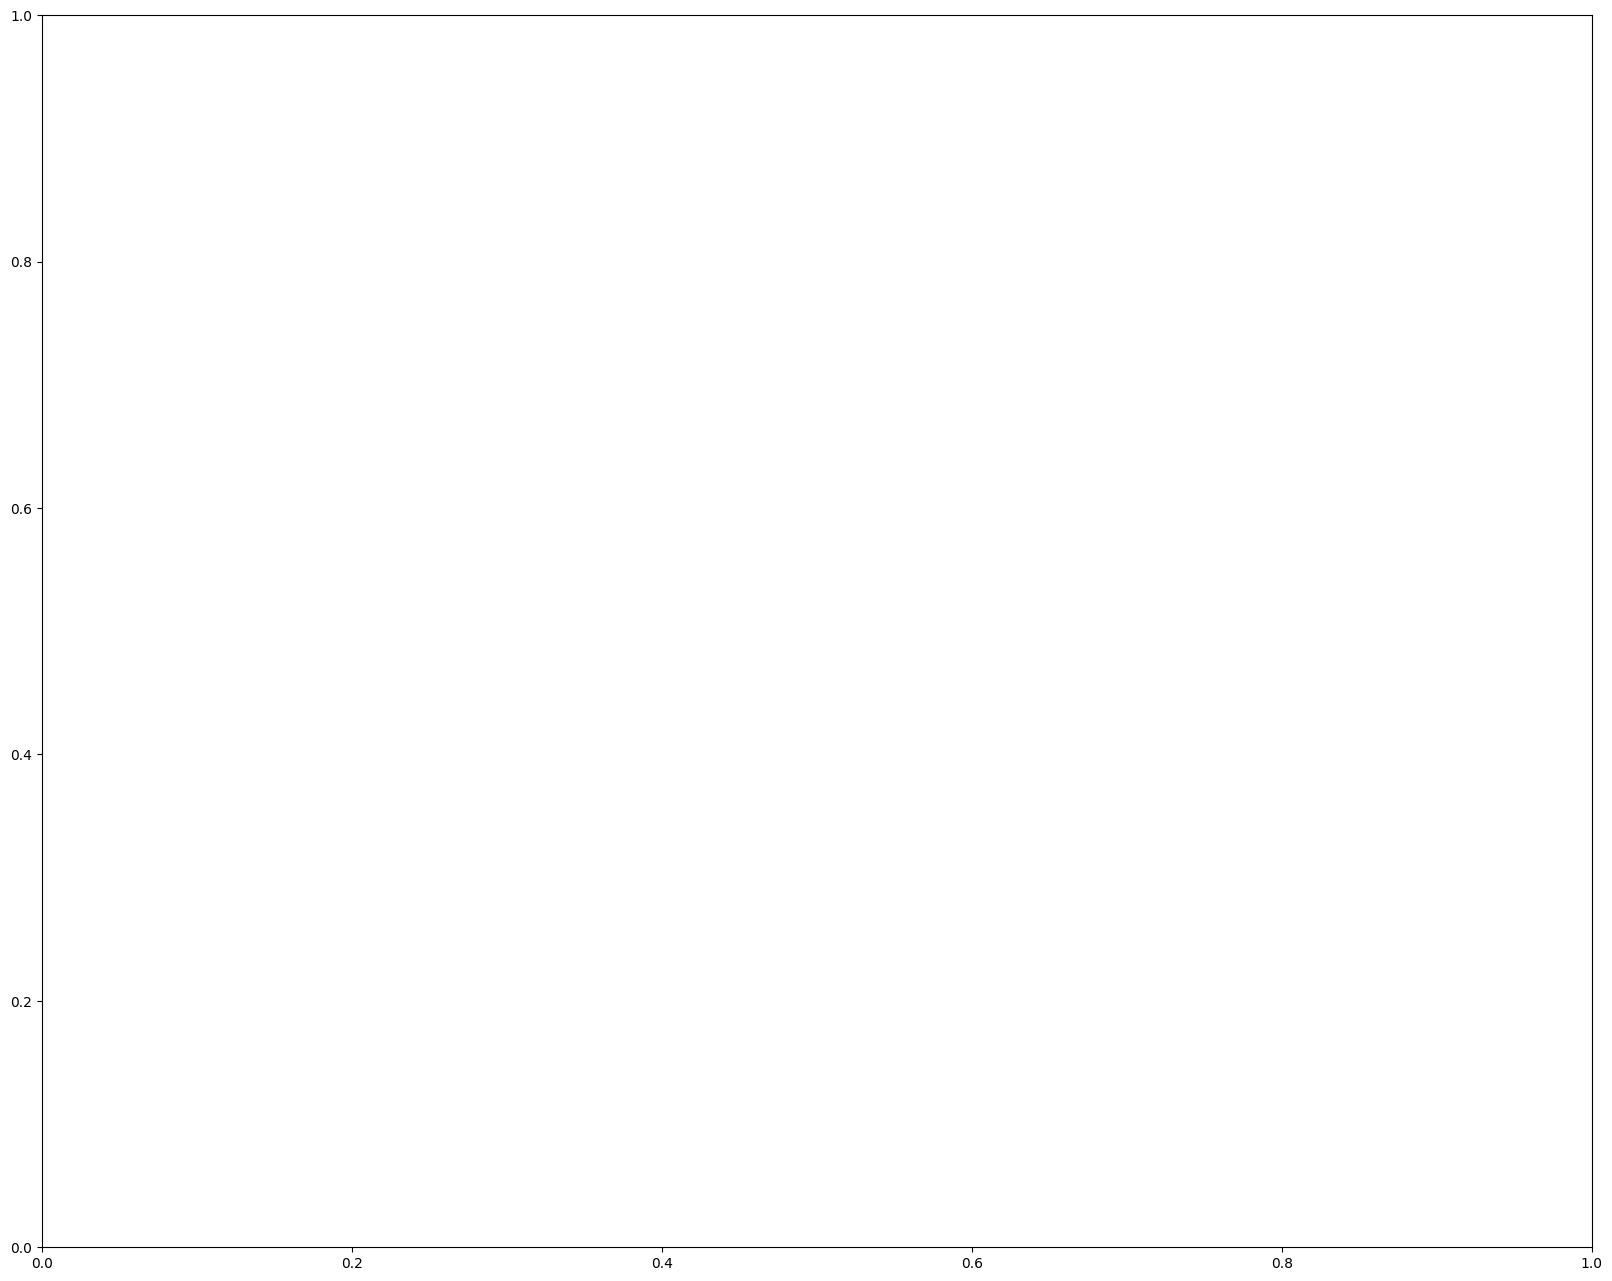

In [216]:
interact(App_inter,fechainicio=inicial,fechafin=final, region=regions)

##### Tabla de contratos sin fecha de incio 

In [217]:
DF_sf = DF_SPublico.groupby(['region'])['valor_del_contrato'].agg({'sum','count'}).reset_index()
DF_sf.rename(columns={'sum':'Total suma contratos','count':'Total cantidad contratos'}, inplace=True)

dfsf = DF_SPublico[(DF_SPublico['fecha_de_inicio_del_contrato'].isnull())]
dfsf = dfsf.groupby(['region'])['valor_del_contrato'].agg({'sum','count'}).reset_index()
dfsf.rename(columns={'sum':'Total suma contratos sin fecha','count':'Total cantidad contratos sin fecha'}, inplace=True)

df_final=pd.merge(DF_sf,dfsf)
df_final['Porcentaje de contratos sin fecha']=((df_final['Total cantidad contratos sin fecha']/df_final['Total cantidad contratos'])*100)
display(df_final.style.format(thousands=',',precision = 2))


,region,Total suma contratos,Total cantidad contratos,Total suma contratos sin fecha,Total cantidad contratos sin fecha,Porcentaje de contratos sin fecha
0,Antioquia,"87,806,018,166.00",165,"2,246,576,530.00",15,9.09
1,Bogota/cundinamarca,"23,471,820,115.00",381,"1,220,623,006.00",36,9.45
2,Caribe,"137,293,446,195.00",398,"3,961,746,058.00",51,12.81
3,Centro oriente,"19,760,011,859.00",373,"533,892,237.00",22,5.90
4,Centro sur,"32,109,901,042.00",249,"15,740,235,966.00",9,3.61
5,Eje cafetero,"9,045,916,339.00",254,"255,198,847.00",26,10.24
6,Llanos,"2,251,547,987.00",112,"42,322,400.00",11,9.82
7,Pacifica,"17,634,919,119.00",270,"343,048,980.00",21,7.78


In [218]:
#El número total de contratos sin fecha es de 191, discriminados así:

# * Antioquia:           15
# * Bogota/cundinamarca: 36
# * Caribe:              51
# * Centro oriente:      22
# * Centro sur:           9
# * Eje cafetero:        26
# * Llanos:              11
# * Pacifica             21

* Permita excluir datos atípicos, utilice un criterio debidamente justificado para excluir los contratos de alto valor.

In [220]:
# Para determinar los datos atípicos iniciamos con una representación gráfica de la distribución de la variable
# valor_del_contrato mediante un gráfico de caja.

sns.boxplot(DF_SPublico['valor_del_contrato'])

KeyError: 0

In [221]:
# Para identificar los datos atípicos, calcularemos el rango intercuartílico: 

Q1 = np.percentile(DF_SPublico['valor_del_contrato'], 25,interpolation = 'midpoint')
Q3 = np.percentile(DF_SPublico['valor_del_contrato'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

C:\Users\mayte\AppData\Local\Temp\ipykernel_18176\2308998272.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(DF_SPublico['valor_del_contrato'], 25,interpolation = 'midpoint')
C:\Users\mayte\AppData\Local\Temp\ipykernel_18176\2308998272.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(DF_SPublico['valor_del_contrato'], 75,interpolation = 'midpoint')


21607500.0

In [222]:
# Ahora separemos el data frame en dos subconjuntos usando los límites superiores e inferiores a partir del resultado 
# obtenido del IQR, quedando un dataframe superior y otro inferior.

DF_SPublico_Superior = DF_SPublico[DF_SPublico['valor_del_contrato'] >= (Q3+1.5*IQR)]
DF_SPublico_Inferior = DF_SPublico[DF_SPublico['valor_del_contrato'] <= (Q1-1.5*IQR)]

# Generamos un nuevo data frame eliminando los dos dataframes anteriores para obtener los contratos del sector sin datos
# atípicos

DF_SPublico_sinatipicos = DF_SPublico[DF_SPublico['valor_del_contrato'] >= (Q1-1.5*IQR)]
DF_SPublico_sinatipicos = DF_SPublico_sinatipicos[DF_SPublico_sinatipicos['valor_del_contrato'] <= (Q3+1.5*IQR)]

display(DF_SPublico_Superior.describe().style.format(thousands=',',precision = 0))
display(DF_SPublico_Inferior.describe().style.format(thousands=',',precision = 0))

display(DF_SPublico_sinatipicos.describe().style.format(thousands=',',precision = 0))

# Generamos un diagrama de caja de la variable valor_del_contrato en el nuevo data frame sin atípicos.
sns.boxplot(DF_SPublico_sinatipicos['valor_del_contrato'])

,valor_del_contrato
count,252
mean,"1,172,893,291"
std,"4,838,568,601"
min,"62,800,000"
25%,"81,170,018"
50%,"152,932,260"
75%,"500,289,700"
max,"65,452,449,341"


,valor_del_contrato
count,0
mean,nan
std,nan
min,nan
25%,nan
50%,nan
75%,nan
max,nan


,valor_del_contrato
count,"2,000"
mean,"17,232,566"
std,"13,278,315"
min,0
25%,"7,800,000"
50%,"13,500,000"
75%,"23,408,750"
max,"62,405,290"


KeyError: 0

##### Punto 3. Haga un reporte frente a los contratos excluidos. Tenga cuidado con ese rango tan amplio de la variable Valor del Contrato. Estudie la cantidad de contratos de ese tipo por regiones, explore la suma del valor del contrato en el tiempo, entre otros.

In [226]:
DF_SPublico_Superior.describe().style.format(thousands=',',precision = 2)

,valor_del_contrato
count,252.00
mean,"1,172,893,291.18"
std,"4,838,568,601.11"
min,"62,800,000.00"
25%,"81,170,017.75"
50%,"152,932,260.50"
75%,"500,289,699.75"
max,"65,452,449,341.00"


In [235]:
DF_SPublico_sinatipicos.describe().style.format(thousands=',',precision = 2)

,valor_del_contrato
count,"2,000.00"
mean,"17,232,566.27"
std,"13,278,314.75"
min,0.00
25%,"7,800,000.00"
50%,"13,500,000.00"
75%,"23,408,749.75"
max,"62,405,290.00"


In [230]:
# Intificamos 252 contratos con valores atípicos, cuya media son los 1,172 billones de pesos y el
# valor máximo es 65,452 billones de pesos

# Ahora veremos la distribución de dichos contratos mediante un gráfico de caja

In [227]:
sns.boxplot(DF_SPublico_sinatipicos['valor_del_contrato'])

KeyError: 0

In [231]:
# Como complemento generamos un histograma de la distribución de la variable valor_del_contrato, en
# donde se observa que que hay una gran proporción de contratos cuyo valor está entre cero y diez billones
# de pesos.

w = widgets.Dropdown(options=DF_SPublico_Superior.columns)

def f(x):
    return plot(DF_SPublico_Superior,x)
interact (f,x=w)


interactive(children=(Dropdown(description='x', options=('nombre_entidad', 'nit_entidad', 'departamento', 'ciu…

<function __main__.f(x)>

In [236]:
pd.set_option('display.max_columns',99)
DF_SPublico_Superior.sort_values(by=['valor_del_contrato'])

,nombre_entidad,nit_entidad,departamento,ciudad,localizaci_n,orden,sector,rama,entidad_centralizada,proceso_de_compra,id_contrato,referencia_del_contrato,estado_contrato,codigo_de_categoria_principal,descripcion_del_proceso,tipo_de_contrato,modalidad_de_contratacion,justificacion_modalidad_de,fecha_de_firma,fecha_de_inicio_del_contrato,fecha_de_fin_del_contrato,condiciones_de_entrega,tipodocproveedor,documento_proveedor,proveedor_adjudicado,es_grupo,es_pyme,habilita_pago_adelantado,liquidaci_n,obligaci_n_ambiental,obligaciones_postconsumo,reversion,valor_del_contrato,valor_de_pago_adelantado,valor_facturado,valor_pendiente_de_pago,valor_pagado,valor_amortizado,valor_pendiente_de,valor_pendiente_de_ejecucion,estado_bpin,c_digo_bpin,anno_bpin,saldo_cdp,saldo_vigencia,espostconflicto,urlproceso,destino_gasto,origen_de_los_recursos,dias_adicionados,puntos_del_acuerdo,pilares_del_acuerdo,nombre_representante_legal,nacionalidad_representante_legal,tipo_de_identificaci_n_representante_legal,identificaci_n_representante_legal,g_nero_representante_legal,presupuesto_general_de_la_nacion_pgn,sistema_general_de_participaciones,sistema_general_de_regal_as,recursos_propios_alcald_as_gobernaciones_y_resguardos_ind_genas_,recursos_de_credito,recursos_propios,ultima_actualizacion,codigo_entidad,codigo_proveedor,objeto_del_contrato,fecha_de_inicio_de_ejecucion,fecha_de_fin_de_ejecucion,fecha_inicio_liquidacion,fecha_fin_liquidacion,region
8372,MUNICIPIO DE TUNJA,891800846,Boyacá,Tunja,"Colombia, Boyacá , Tunja",Territorial,Servicio Público,Ejecutivo,Descentralizada,CO1.BDOS.2444908,CO1.PCCNTR.3116342,1173 de 2021,terminado,V1.82151704,PRESTACION DE SERVICIOS ARTISTICOS DE BEELE EN...,Prestación de servicios,Contratación directa,Ejecución de trabajos artísticos,2021-12-14T20:12:40.000,2021-12-16,2021-12-20,Como acordado previamente,No Definido,900982292,ALIVE PRODUCTIONS SAS,No,No,No,No,No,No,No,6.280000e+07,0,62800000,0,62800000,0,0,62800000,Válido,2020150010006,2021,2561640000,0,No,{'url': 'https://community.secop.gov.co/Public...,Inversión,Distribuido,0,No aplica,No aplica,ALLAN HORACIO ACOSTA VELASQUEZ,COLOMBIANO,Cédula de Ciudadanía,1116780965,Hombre,0,0,0,62800000,0,0,2022-04-20T00:00:00.000,702354804,715932281,PRESTACION DE SERVICIOS ARTISTICOS DE BEELE EN...,NaN,NaN,NaN,NaN,Centro oriente
9969,GOBERNACIÓN DEPARTAMENTO DEL PUTUMAYO,800094164,Putumayo,Mocoa,"Colombia, Putumayo , Mocoa",Territorial,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.3195804,CO1.PCCNTR.3958819,CVI-015-2022,Activo,V1.81101500,MEJORAMIENTO DEL MUELLE A ORILLAS DEL RIO CAQU...,Otro,Contratación directa,ContratosConveniosInteradministrativosValorCero,2022-08-26T17:08:38.000,NaT,2022-11-26,No Definido,No Definido,800222489,MUNICIPIO DE PUERTO GUZMAN,No,No,No,No,No,No,No,6.292823e+07,0,0,62928228,0,0,0,62928228,Válido,No Definido,N/D,62928228,0,No,{'url': 'https://community.secop.gov.co/Public...,Inversión,Recursos Propios,0,No aplica,No aplica,EDISON GERARDO MORA ROJAS,COLOMBIANO,Sin Descripcion,97425368,No Definido,0,0,0,0,0,62928228,2022-08-30T00:00:00.000,702475393,709801229,MEJORAMIENTO DEL MUELLE A ORILLAS DEL RIÓ CAQU...,NaN,NaN,NaN,NaN,Centro sur
3475,ALCALDIA LOCAL DE KENNEDY,899999061,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Territorial,Servicio Público,Ejecutivo,Descentralizada,CO1.BDOS.1865387,CO1.PCCNTR.2370750,CPS-205-2021,Modificado,V1.80101600,PRESTAR SERVICIOS PROFESIONALES PARA APOYAR LA...,Prestación de servicios,Contratación directa,ServiciosProfesionales,2021-03-23T14:03:05.000,2021-03-26,2022-05-23,A convenir,Cédula de Ciudadanía,1018454328,Liby Estefanny Rivera Amézquita,No,No,No,No,No,No,No,6.300000e+07,0,56466666,18706667,44293333,0,0,8549100,Válido,No Definido,2021,65000000,0,No,{'url': 'https://community.secop.gov.co/Public...,Inversión,Recursos Propios,143,No aplica,No aplica,Estefanny Rivera,colombiana,Sin Descripcion,1018454328,No Definido,0,0,0,0,0,63000000,2022-05-06T00:00:00.000,702292459,703434209,PRESTAR SER

In [239]:
# Con el propósito de ver en el tiempo el valor de los contratos por regiones, creamos una nueva variable con el año de la fecha de inicio
# del contrato
DF_SPublico_Superior['Año_inicio_contrato'] = DF_SPublico_Superior['fecha_de_inicio_del_contrato'].dt.year

C:\Users\mayte\AppData\Local\Temp\ipykernel_18176\1509462481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_SPublico_Superior['Año_inicio_contrato'] = DF_SPublico_Superior['fecha_de_inicio_del_contrato'].dt.year


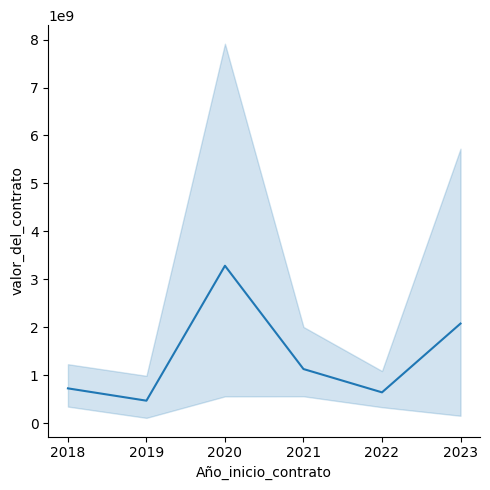

In [241]:
sns.relplot(x = "Año_inicio_contrato", y = "valor_del_contrato", data = DF_SPublico_Superior, kind = "line")

In [244]:
# El año con el mayor valor de contratos fue el año 2020 y el año de menor valor fue el 2019. 

## Punto 4. Haga un reporte frente a los contratos NO excluidos.


In [234]:
w = widgets.Dropdown(options=DF_SPublico_sinatipicos.columns)

def f(x):
    return plot(DF_SPublico_sinatipicos,x)
interact (f,x=w)

interactive(children=(Dropdown(description='x', options=('nombre_entidad', 'nit_entidad', 'departamento', 'ciu…

<function __main__.f(x)>

In [246]:
# De acuerdo con el histograma los contratos no excluidos se encuentran concentrados a la izquierda de la distribución

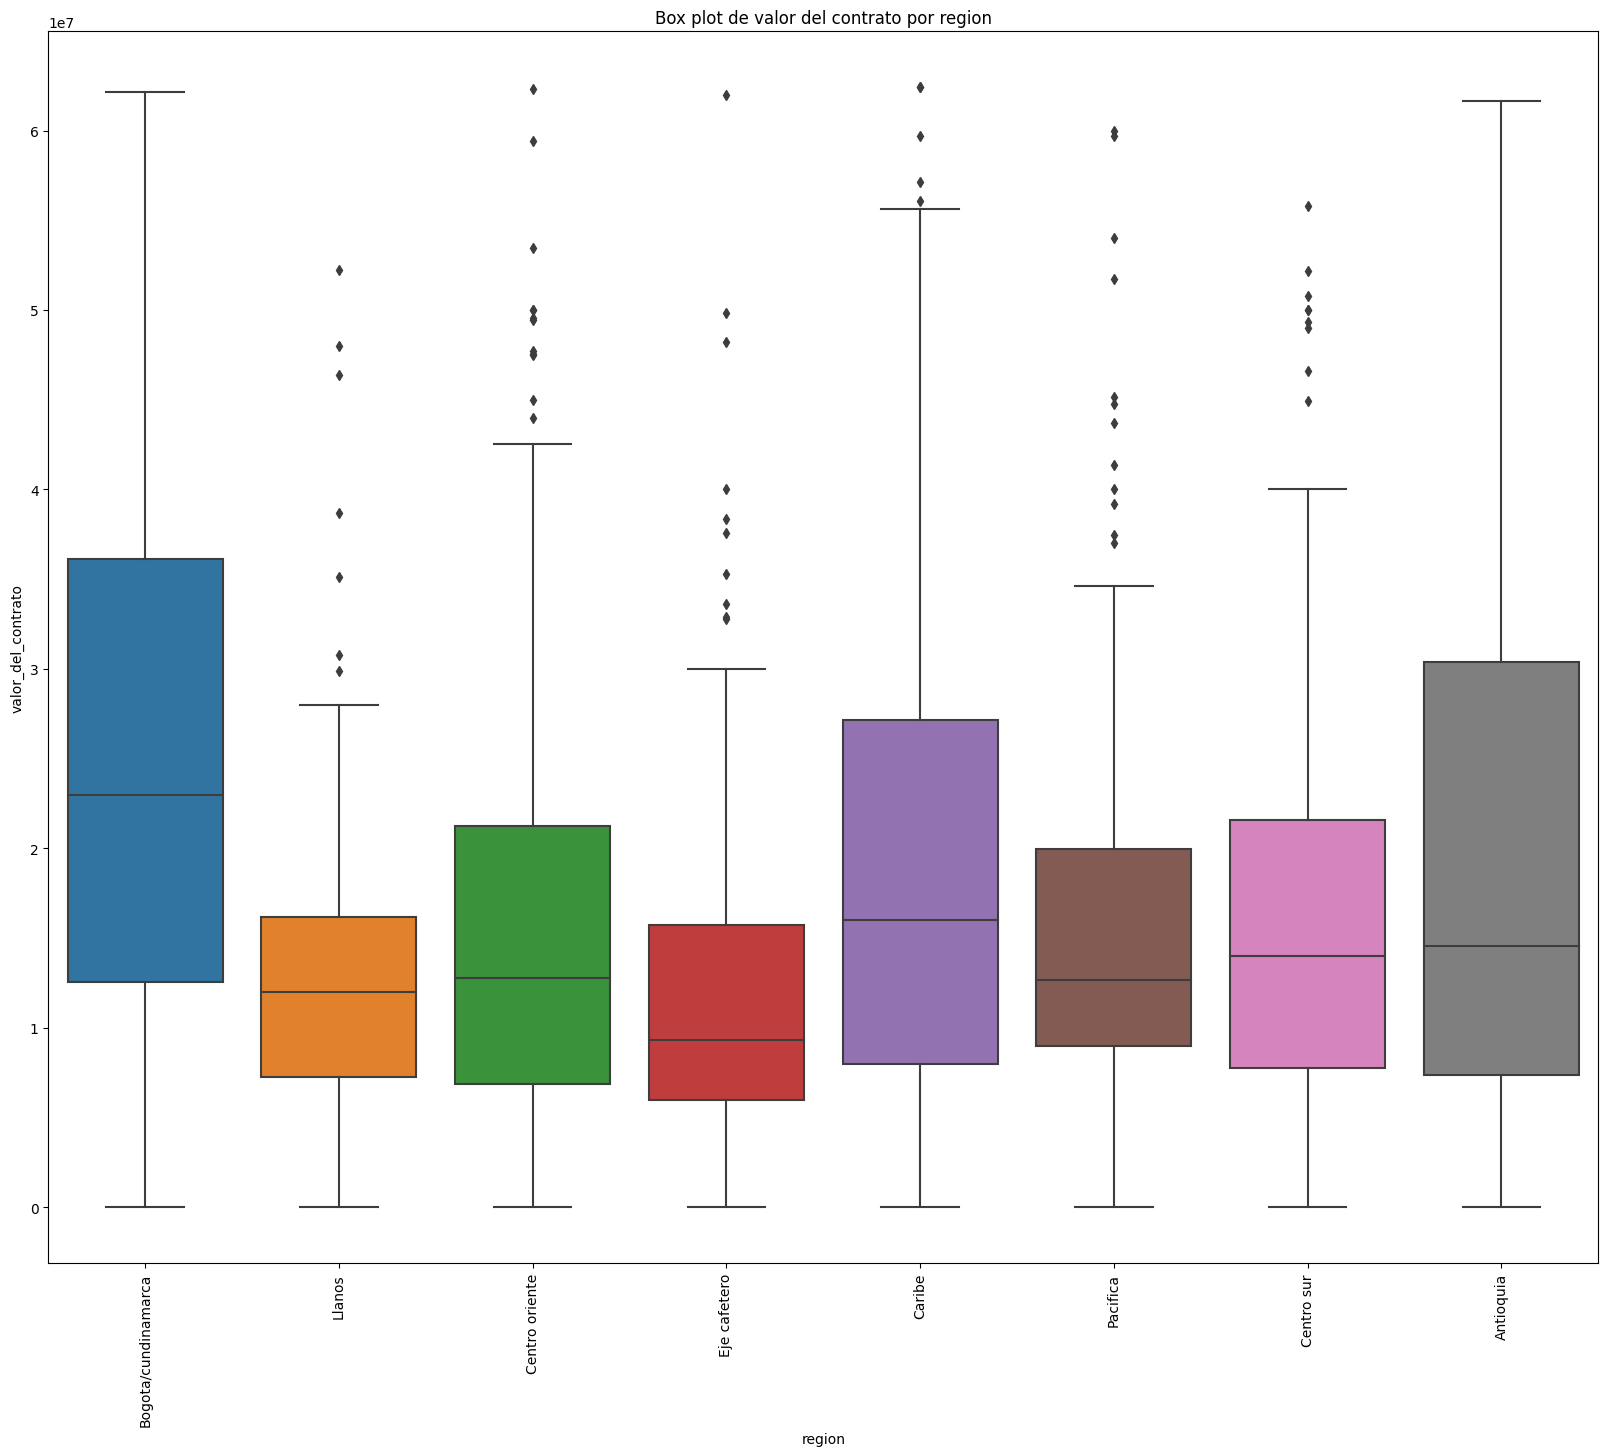

In [245]:
fig, axs = plt.subplots(figsize=(20,16))
axs=sns.boxplot(data=DF_SPublico_sinatipicos,y='valor_del_contrato',x="region")
axs.set_xticklabels(axs.get_xticklabels(), rotation=90)
axs.set(title='Box plot de valor del contrato por region');

In [248]:
# Al revisar los diagramas de caja de la variable valor_del_contrato por región se observa que la región con mayor media es la de Bogota-Cundinamarca, lo cual coincide con 
# que las sedes principales de la entidades del estado se encuentran en el distrito capital y desde allí toman las decisiones para las sucursales o sedes que tengan
# en el resto del país. 
# Las regiones que presentan mayor variabiilidad en los valores de los contratos son las de Bogotq/Cundinamarca, Antioquia y Caribe.
# Las regiones que no muestran datos atípicos en este gráfico son Bogota/Cundinamarca y Antioquia.

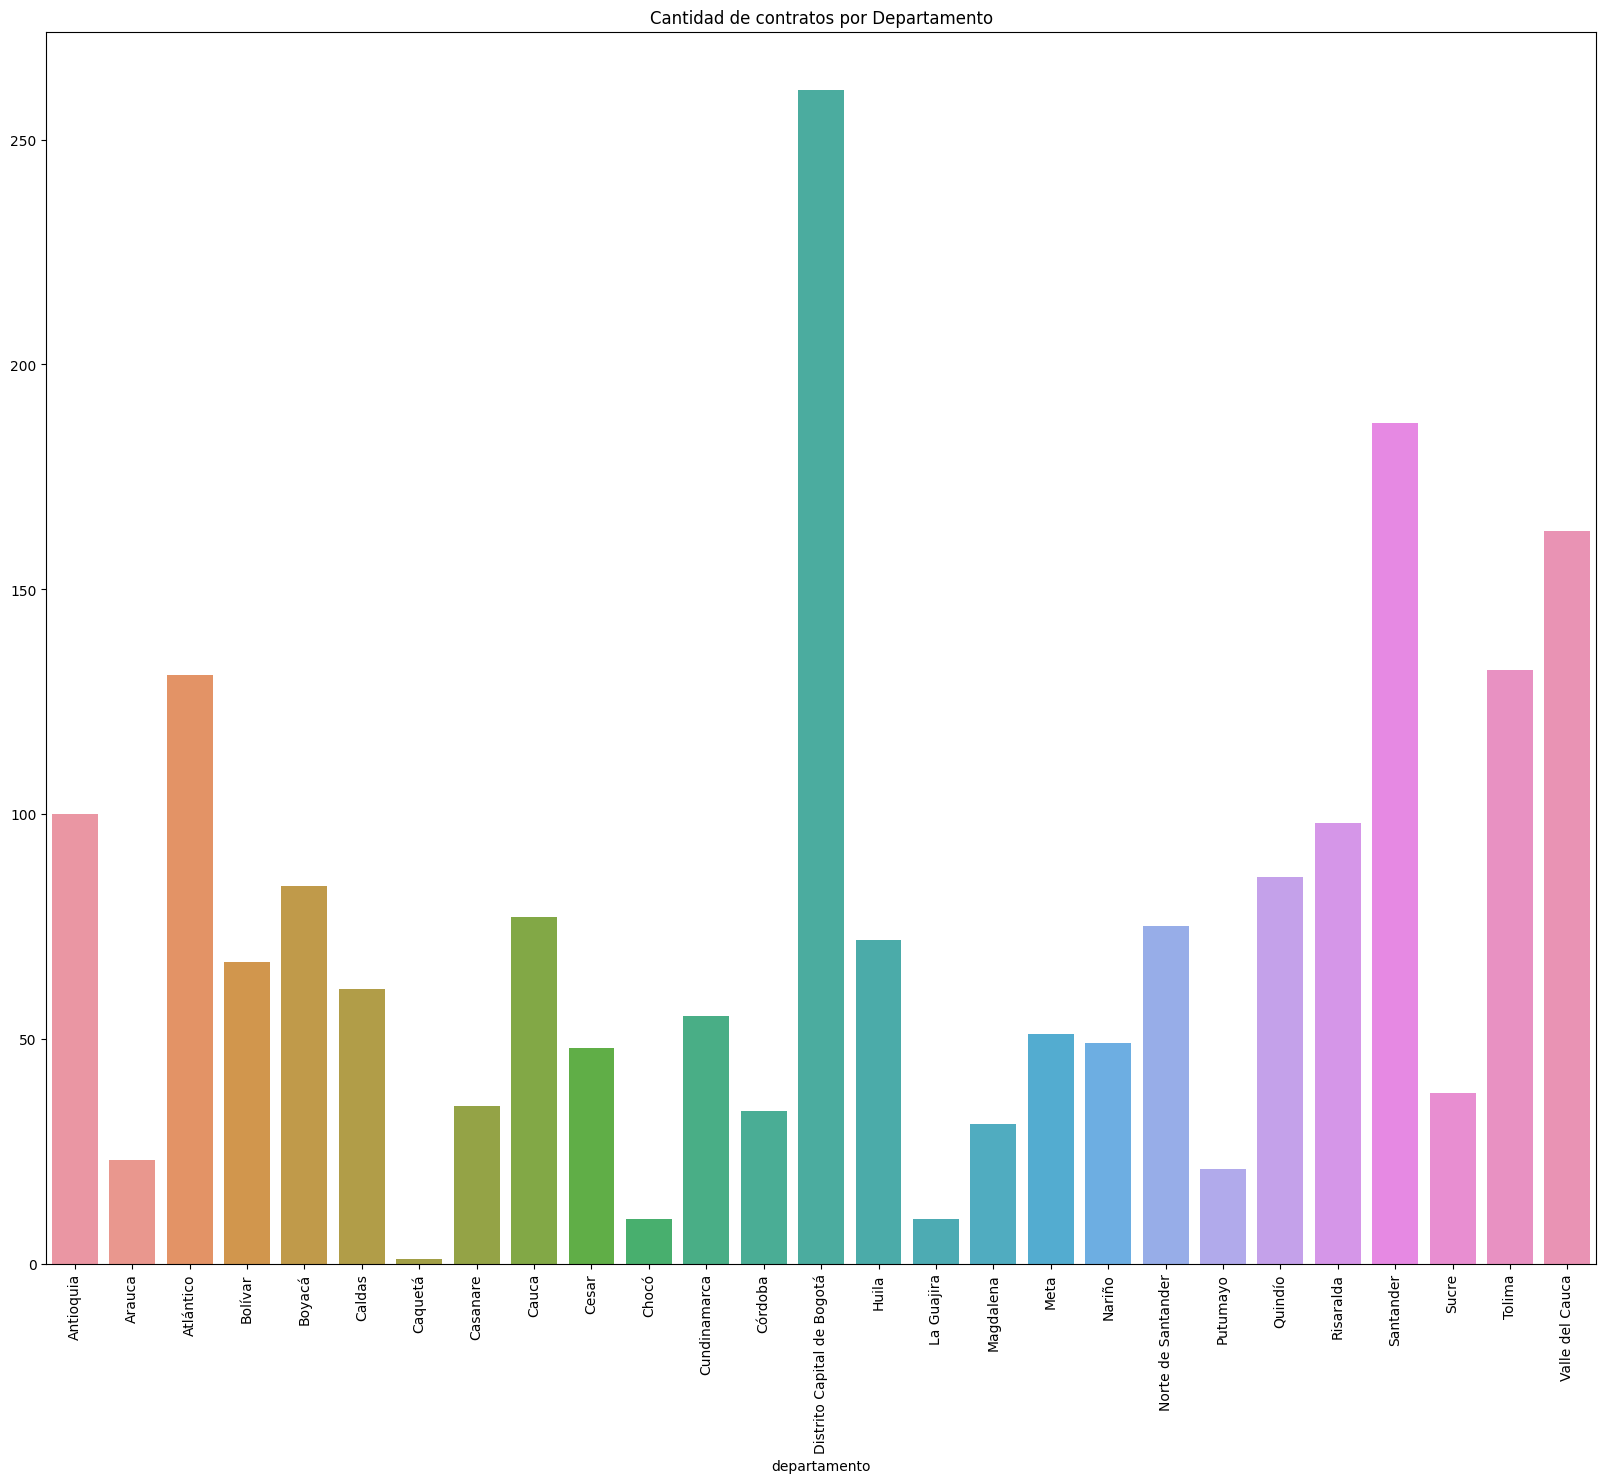

In [247]:
fig, axs = plt.subplots(figsize=(20,16))
axs=sns.barplot(y=DF_SPublico_sinatipicos.groupby(by='departamento').size().values,x=DF_SPublico_sinatipicos.groupby(by='departamento').size().index)
axs.set_xticklabels(axs.get_xticklabels(), rotation=90)
axs.set(title='Cantidad de contratos por Departamento');

## Punto 5. Haga observaciones y recomendaciones con los resultados observado